
# TAREA DE MODELO DE COX

**Estadística Aplicada**

**Nombre:** Verónica Vanessa Aguilar Ortiz

**Matricula:** 1855188

**Grupo:** 051

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [14]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [15]:
df = pd.read_excel('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/supervivencia_examenes.xlsx')

In [16]:
df

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


**a) Estadísticas descriptivas. Calcule el tiempo promedio que tardaron en 
responder los alumnos el examen y la calificación promedio obtenida.
El profesor sospecha que las alumnas responden más rápido el examen, 
calcule el tiempo promedio que tardaron en responder las alumnas y su 
calificación promedio, asi como el tiempo promedio que tardaron en 
responder los alumnos y su calificación promedio.**

In [28]:
#Amboos sexos
df_mean_time = df['tiempo'].mean()
df_mean_cal = df['calificación'].mean()
m = df[df['género'] == 'm']
f = df[df['género'] == 'f']

In [29]:
print(f'El tiempo promedio que tardaron en responder los alumnos el examen es de: {df_mean_time} y la calificación promedio obtenida es de:{df_mean_cal}')

El tiempo promedio que tardaron en responder los alumnos el examen es de: 107.3529411764706 y la calificación promedio obtenida es de:90.70588235294117


In [30]:
##Hombres (m)
time_m = hombres['tiempo']
examen_m = hombres['examen']
cal_m = hombres['calificación']
timemean_m = time_m.mean()
calmean_m = cal_m.mean()

In [31]:
print(f'El tiempo promedio que tardaron en responder las alumnas es de: {timemean_f} y su calificacion promedio es de: {calmean_f}')

El tiempo promedio que tardaron en responder las alumnas es de: 108.125 y su calificacion promedio es de: 93.0


In [32]:
## Mujeres (f)
time_f = mujeres['tiempo']
examen_f = mujeres['examen']
cal_f = mujeres['calificación']
timemean_f = time_f.mean()
calmean_f = cal_f.mean()

In [33]:
print(f'El tiempo promedio que tardaron en responder los alumnos es de: {timemean_m} y su calificacion promedio es de: {calmean_m}')

El tiempo promedio que tardaron en responder los alumnos es de: 106.66666666666667 y su calificacion promedio es de: 88.66666666666667


**b) Estime la función de supervivencia del tiempo de entrega del examen de 
todos los alumnos utilizando Kaplan-Meier, muestre los valores de la función de supervivencia, los valores del intervalos de confianza al 95%, 
asi como la gráfica respectiva de la función de supervivencia con sus 
intervalos.**


In [34]:
from lifelines import*
from lifelines import KaplanMeierFitter

In [35]:
KMF = KaplanMeierFitter()

**-Función de supervivencia del tiempo de entrega del examen**

,Hombres
timeline,
0.0,1.000000
85.0,0.888889
87.0,0.777778
103.0,0.666667
109.0,0.555556
111.0,0.444444
112.0,0.333333
116.0,0.222222
118.0,0.111111


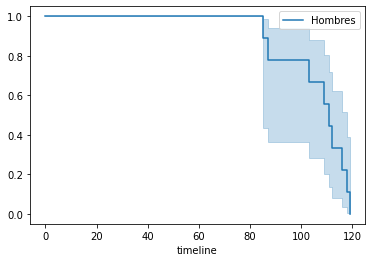

In [45]:
##hombres
ax = plt.subplot(111)
KMF.fit(time_m,cal_m,label = "Hombres").plot(ax=ax)
KMF.survival_function_

,Mujeres
timeline,
0.0,1.000
90.0,0.875
99.0,0.750
106.0,0.625
108.0,0.375
115.0,0.250
119.0,0.125
120.0,0.000


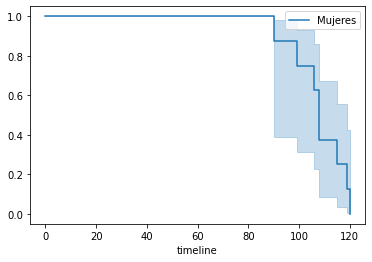

In [46]:
#Función de supervivencia de las mujeres
ax = plt.subplot(111)
KMF.fit(time_f,cal_f,label = "Mujeres").plot(ax=ax)
KMF.survival_function_

**-Los valores del intervalos de confianza al 95%**

,Hombres_lower_0.95,Hombres_upper_0.95
0.0,1.000000,1.000000
85.0,0.432965,0.983564
87.0,0.364751,0.939296
103.0,0.281682,0.878307
109.0,0.204242,0.804525
111.0,0.135872,0.719315
112.0,0.078289,0.622627
116.0,0.033711,0.513068
118.0,0.006129,0.387665
119.0,0.000000,0.000000


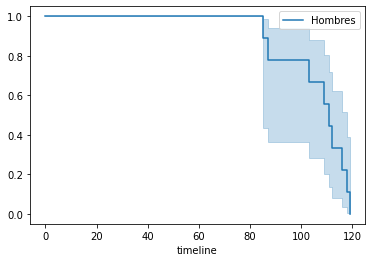

In [47]:
#Intervalos de confianza de los hombres
ax = plt.subplot(111)
KMF.fit(time_m,cal_m,label = "Hombres").plot(ax=ax)
KMF.confidence_interval_

,Mujeres_lower_0.95,Mujeres_upper_0.95
0.0,1.000000,1.000000
90.0,0.387000,0.981393
99.0,0.314807,0.930898
106.0,0.229333,0.860698
108.0,0.087006,0.674363
115.0,0.037067,0.558084
119.0,0.006593,0.422706
120.0,0.000000,0.000000


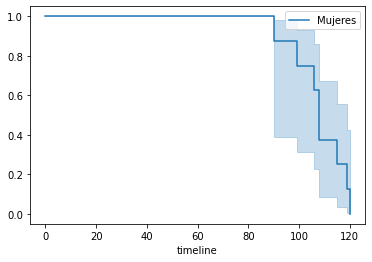

In [48]:
#Intervalos de confianza de las mujeres
ax = plt.subplot(111)
KMF.fit(time_f,cal_f,label = "Mujeres").plot(ax=ax)
KMF.confidence_interval_

**c) Realice un gráfico donde muestre la función de supervivencia de Kaplan-Meier de los alumnos (m) y de las alumnas (f) con sus respectivos 
intervalos de confianza. Y comente con base en la gráfica si es posible que 
el profesor tenga razón respecto a que las alumnas responden más 
rápido el examen.**

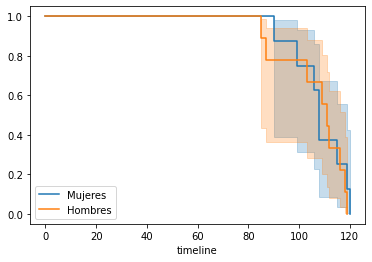

In [51]:
ax = plt.subplot(111)
ax = KMF.fit(time_f,cal_f,label = "Mujeres").plot(ax=ax)
ax = KMF.fit(time_m,cal_m,label = "Hombres").plot(ax=ax)

Comentario: con base en la gráfica no seria posible que 
el profesor tenga razón respecto a que las alumnas responden más 
rápido el examen.


**d) Realice el log rank test para probar si las funciones de supervivencia de 
alumnos y alumnas para responder el examen son iguales. Comente el 
resultado de la prueba de hipótesis y diga si el profesor tuvo razón o no.**

Pruebas de Hipótesis

H0: Las funciones de supervivencia de hombres y mujeres son iguales.

H1: Las funciones de supervivencia de hombres y mujeres son distintas.


In [52]:
from lifelines.statistics import logrank_test
results = logrank_test(time_m,time_f, event_observed_A =cal_hom, event_observed_B = cal_f)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

Comentario: el resultado de la prueba de hipótesis: tenemos que nuestro p-valor es de 0.69 y nuestra alfa de 0.05, entonces como 0.69 > 0.05 NO se rechaza H0, por lo tanto las funciones de supervivencia de hombres y mujeres son iguales.

**e) El profesor tambien sospecha que quienes entregan el examen más 
rápido es porque no estudiaron y cómo no saben que responder 
entregan el examen casi inmediatamente. 
Estime un modelo de cox de riesgos proporcionales donde utilice como 
variables explicativas el género y la calificación obtenida, para explicar la 
función de riesgo de entregar el examen.**


In [53]:
df_dummies = pd.get_dummies(df,columns=['género'], drop_first = True)

In [54]:
df_dummies

,id,tiempo,examen,calificación,género_m
0,1,85,1,100.0,1
1,2,109,1,100.0,1
2,3,118,1,100.0,1
3,4,120,1,100.0,0
4,5,106,1,98.0,0
5,6,103,1,98.0,1
6,7,108,1,96.0,0
7,8,119,1,96.0,0
8,9,115,1,96.0,0
9,10,108,1,94.0,0


In [55]:
cph = CoxPHFitter()
cph.fit(df_dummies, duration_col='tiempo', event_col='examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2022-05-11 03:41:21 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género_m       0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
género_m         0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

**f) Interprete los coeficientes de género y calificación obtenidos por el 
modelo de cox, recuerde señalar: 1) si el coeficiente es significativo (se 
rechaza Ho), en caso de ser significativo señala si aumentan el riesgo de 
entregar el examen, y el tamaño del efecto. Recuerde añadir cph.plot()
para ayudarse con la interpretación.**


<AxesSubplot:xlabel='log(HR) (95% CI)'>

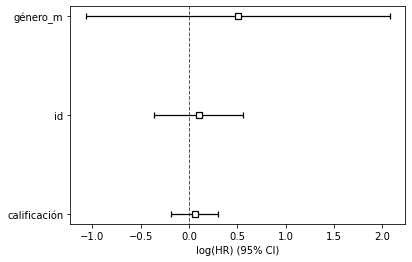

In [67]:
cph.plot()

**g) Utilice cph.plot_partial_effects_on_outcome(covariates='variable', 
values=[0,1]) para estimar las funciones de supervivencia de alumnos y 
alumnas de acuerdo con el modelo de cox ¿obtiene resultados similares 
al inciso c, es decir, coincide con las funciones de supervivencia de Kaplan-Meier?**

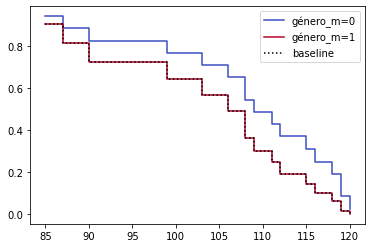

In [63]:
cph.plot_partial_effects_on_outcome(covariates='género_m', values=[0,1], cmap="coolwarm");

Comentario: Al comparar las gráfcas de ambos modelos, Kaplan-Meier y Cox vemos que los hombres tienden a terminar el examen en menos tiempo a comparacion con las mujeres.


**h) Por último, con base en la interpretación del modelo de cox y la 
significancia de los coeficientes, comente si el profesor tiene razón al 
señalar que las alumnas responden en menor tiempo el examen, y si el 
profesor tambien tiene razón al señalar que los que entregan el examen 
rápido no estudiaron y por tanto obtienen menores calificación.**

Comentario: Con base en la interpretacion del modelo de Cox y la diferencia de los coeficientes podemos decir que el profesor no tiene razón al decir que las mujeres terminan el examen en menos tiempo en comparación que los hombres. Al igual tenemos que no tiene razon al señalar que los que entregan el examen más rápido tienen menores calificaciones, ya que no hay relación entre estos.
